<a href="https://colab.research.google.com/github/kaua-hl/accounts/blob/main/credit_risk_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando e importando bibliotecas

In [2]:
!pip install plotly --upgrade

import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Baixando os dados do Kaggle

In [78]:
df = pd.read_csv("/datasets/credit_risk_dataset.csv");

## Visualizando os Dados e verificando quais os objetivos da análise

In [21]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [22]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [52]:
np.unique(df['loan_status'], return_counts=True)

# 0 = Pagam o empréstimo
# 1 = Não pagam o empréstimo

(array([0, 1]), array([25473,  7108]))

<Axes: xlabel='loan_status', ylabel='count'>

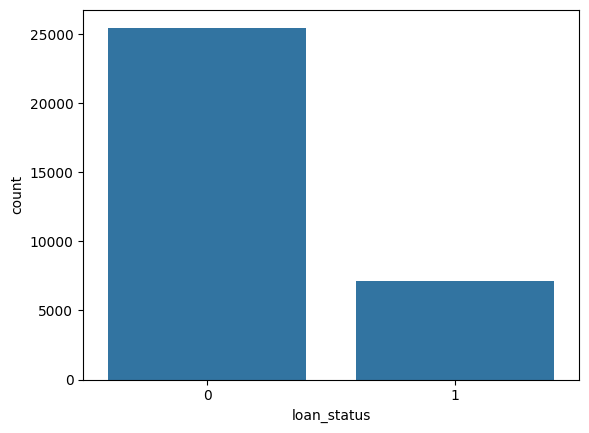

In [55]:
sns.countplot(x=df['loan_status'])

(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

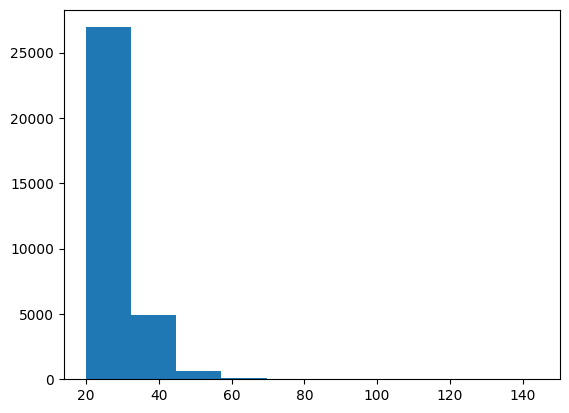

In [60]:
plt.hist(x = df["person_age"])

(array([3.2542e+04, 3.3000e+01, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000e+03, 6.0360e+05, 1.2032e+06, 1.8028e+06, 2.4024e+06,
        3.0020e+06, 3.6016e+06, 4.2012e+06, 4.8008e+06, 5.4004e+06,
        6.0000e+06]),
 <BarContainer object of 10 artists>)

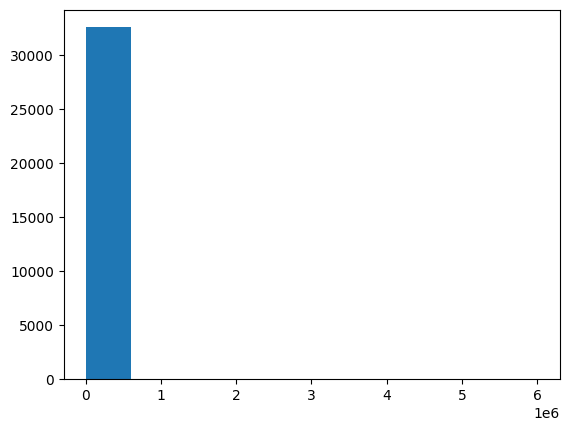

In [61]:
plt.hist(x = df["person_income"])

(array([5118., 9436., 7387., 3907., 2869., 1926.,  675.,  925.,  125.,
         213.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <BarContainer object of 10 artists>)

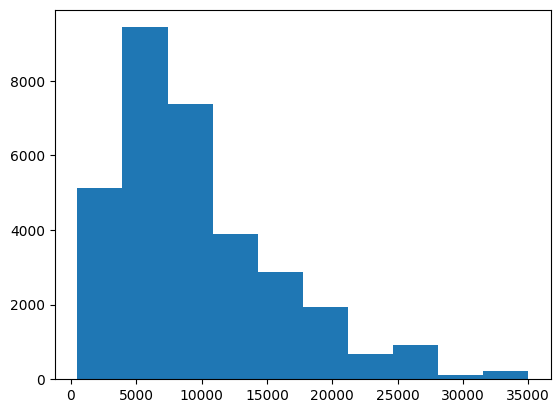

In [62]:
plt.hist(x = df["loan_amnt"])

In [67]:
graph = px.scatter_matrix(df, dimensions=["person_age", "person_income", "loan_amnt"], color="loan_status")
graph.show()

## Tratando os Dados

In [147]:
## 1 Verificando dados negativos no df
for column in df.columns:
  if df[column].dtype == "int64" or df[column].dtype == "float64":
    print(column, len(df[df[column] < 0]))


## 2 verificação de valores nulos

df.isnull().sum()

person_age 0
person_income 0
person_emp_length 0
loan_amnt 0
loan_int_rate 0
loan_status 0
loan_percent_income 0
cb_person_cred_hist_length 0


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [146]:
# Criando uma cópia do df para modificações posteriores e deletando colunas que não serão usadas

df_copy = df

columns_removed = [
    "person_home_ownership",
    "person_emp_length",
    "loan_intent",
    "loan_grade",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_default_on_file",
    "cb_person_cred_hist_length"
]

df_copy = df_copy.drop(columns=columns_removed)



,0
person_age,0
person_income,0
loan_amnt,0
loan_status,0
